In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.image as mpimg
import seaborn as sns

# 5-2 차원 축소 (Dimension Reduction)

## 0. 데이터셋 소개

### Wild blueberry

[Wild blueberry](https://data.mendeley.com/datasets/p5hvjzsvn8/1) 야생 블루베리의 수확량을 시뮬레이션한 데이터셋입니다.


|Features|Unit|Description|
|:--------|:----|:-----------|
|Row#||Index|
|clonesize|m2|The average blueberry clone size in the field|
|honeybee|bees/m2/min|Honeybee density in the field|
|bumbles|bees/m2/min|Bumblebee density in the field|
|andrena|bees/m2/min|Andrena bee density in the field|
|osmia|bees/m2/min|Osmia bee density in the field|
|MaxOfUpperTRange|℃|The highest record of the upper band daily air temperature during the bloom season|
|MinOfUpperTRange|℃|The lowest record of the upper band daily air temperature|
|AverageOfUpperTRange|℃|The average of the upper band daily air temperature|
|MaxOfLowerTRange|℃|The highest record of the lower band daily air temperature|
|MinOfLowerTRange|℃|The lowest record of the lower band daily air temperature|
|AverageOfLowerTRange|℃|The average of the lower band daily air temperature|
|RainingDays|Day|The total number of days during the bloom season, each of which has precipitation larger than zero|
|AverageRainingDays|Day|The average of raining days of the entire bloom season|
|fruitset||The amount of fruit per tree|
|fruitmass||The mass of a fruit|
|seeds||The mass of a seed|
|yield||The amount of yield|

간단하게 여러 아이디어를 실험해볼 수 있는 데이터셋입니다.

In [2]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


### SMS Spam dataset

[Spam](https://archive.ics.uci.edu/dataset/228/sms+spam+collection):SMS 텍스트로 메세지와 Spam 여부를 나타낸 데이터셋입니다.

|Name|Type|Description|
|----|---|---------|
|target|binary|ham or spam|
|message|text|SMS message|

텍스트를 입력으로 분류를 연습하기 위한 데이터셋입니다.

In [3]:
df_spam = pd.read_csv('data/SMSSpamCollection.tsv', sep='\t')
df_spam.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Abalone

[Abalone](https://archive.ics.uci.edu/dataset/1/abalone) 데이터셋: 전복의 생육 정보 데이터입니다.


|Name|Data Type|	Meas.|	Description|
|----|---------|-----|-----------|
|Sex|nominal||M, F, and I (infant)|
|Length|continuous|mm|Longest shell measurement|
|Diameter|continuous|mm|perpendicular to length|
|Height|continuous|mm|with meat in shell|
|Whole|continuous|grams|whole abalone|
|Shucked|continuous|grams|weight of meat|
|Viscera|continuous|grams|gut weight (after bleeding)|
|Shell|continuous|grams|after being dried|
|Rings|integer||+1.5 gives the age in years|

분류와 회귀 문제 모두를 다루어 볼 수 있는 데이터셋입니다.

In [4]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 1. 주성분 분석(Principal Component Analysis, PCA)

주성분 분석은 공분산 행렬의 고윳값 분해를 통한 데이터가 지닌 정보량을 분석하는 방법입니다.

주성분 분석을 이해하기 위해 공분산 행렬과 고윳값 분해에 대해 알아본 다음에 의미를 파악해봅니다.

### 공분산 행렬 (Covariance Matrix)

- 공분산의 의미

두 변수의 선형적 연관성을 나타냅니다. 

상관도는 두 변수가 공통적으로 지니는 변동성(정보의 양)입니다.

- 공분산 행렬은 다변량 데이터 변수들 간의 선형 관계를 나타내는 행렬입니다. 

p 차원의 데이터 X를 아래와 같이 나타냅니다.

$X = \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1p} \\ x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix} $

- 공분산 행렬을 아래와 같이 나타냅니다. 

$cov(X) = \begin{bmatrix} \sigma_{11} & \sigma_{12} & \ldots & \sigma_{1p} \\ \sigma_{21} & \sigma_{22} & \ldots & \sigma_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ \sigma_{p1} & \sigma_{p2} & \ldots & \sigma_{pp} \end{bmatrix}$

- 공분산 행렬의 요소 $\sigma_{ij}$는 X의 i번째 변수(열벡터, column vector)와 j번째 변수의 공분산입니다.

> 모공분산: $\sigma_{ij}=\frac{1}{n}\sum_{k=1}^n(x_{ik} - \bar{x_i})(x_{jk} - \bar{x_j})$
>
> 표본공분산: $\sigma_{ij}=\frac{1}{n - 1}\sum_{k=1}^n(x_{ik} - \bar{x_i})(x_{jk} - \bar{x_j})$

#### 공분산 행렬의 성질

- 대각 요소는 i번째 변수의 분산입니다.


- 대칭형 행렬입니다.


- 양의 준정부호성(Positive semi-definitive)

> A가 양의 준정부호성이 있다는 것은 모든 벡터 x에 대해 $x^TAx \ge 0$을 의미합니다. 
>
> A가 양의 준정부호성이 있다는 것은 A의 모든 고윳값은 0 또는 양수가 됩니다.

### 고윳값 분해(Eigen-value decomposition )

#### 고윳값(Eigen-value)과 고유벡터(Eigen-vector)

<div style="border: 0px solid #ddd; padding: 5px; margin-top: 10px; margin-left: 10px;">

정방행렬 A가

> $Ax = \lambda x$, $x \ne \mathbf{0}$

를 만족하는 0 벡터가 아닌 $x$를 고유벡터(Eigen-vector)라고 합니다. 이 때 $\lambda$를 고윳값(Eigen-value)입니다.

고윳값을 구하기 위해, 아래와 같이 이항 정리하여 나타냅니다.

> $(A - \lambda I)x = \mathbf{0}$ , $I$: A와 크기가 같은 단위 행렬
>
> $(A - \lambda I)$는 역행렬이 없을 때, $x \ne \mathbf{0}$가 성립합니다. 

따라서, $det(A - \lambda I)  = 0$ 입니다.

$det(A - \lambda I)$의 p차의 다항식입니다. (p은 행렬 A의 크기)

따라서, 고윳값은 최대 p개 있습니다.
    
</div>

#### 고윳값 분해

<div style="border: 0px solid #ddd; padding: 5px; margin-top: 10px; margin-left: 10px;">

정방 행렬 A의 각 고윳값들을 $\lambda_1, \lambda_2, ... , \lambda_p$

고윳값에 해당하는 고유벡터를 $q_1, q_2, ..., q_p$,

고유행렬 $Q = \begin{bmatrix} q_1 & q_2 & \ldots & q_p \end{bmatrix}$,

대각요소가 고윳값이고 나머지는 0인 행렬,

$\Lambda = \begin{bmatrix} \lambda_1 & 0 & \ldots & 0 \\ 0 & \lambda_2 & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \ldots & \lambda_p \end{bmatrix}$ 

으로 정의합니다.

고유벡터와 고윳값을 정의한 식에 의해 아래와 같은 관계가 성립합니다.

> $AQ = Q\Lambda$

이 식에 의해 정방 행렬 A는 

> $A = Q \Lambda Q^{-1}$가 유도 됩니다. 

이렇게 $A$ 를 $Q$, $\Lambda$, $Q^{-1}$ 세 개의 행렬의 행렬 곱으로 분해하는 것을 고윳값 분해라고 합니다.
    
</div>

#### 주요 성질 

1. A가 대칭행렬이라면,

<div style="border: 0px solid #ddd; padding: 5px; margin-top: 10px; margin-left: 20px;">

$A=A^T$ 입니다. 

$A^T = (Q \Lambda Q^{-1})^T = (Q^{-1})^T \Lambda Q^T$입니다. 

$Q \Lambda Q^{-1} = (Q^{-1})^T \Lambda Q^T$가 됩니다.

따라서, $Q^T = Q^{-1}$ 가 됩니다.  ($Q^T = Q^{-1}, Q^TQ = I$ 인 행렬을 정규직교행렬(orthor normal matrix)라고 합니다.)

그리고, $A = Q \Lambda Q^{T}$ 가 됩니다.

</div>

2. A가 X의 그람 행렬(Gram Matrix, $A = X^TX$)이라고 가정하면, XQ의 그람 행렬(Gram Matrix)은 $\Lambda$가 됩니다.

> $ X^TX = Q \Lambda Q^{T}$
>
> $Q^TX^TXQ = (XQ)^T(XQ) = \Lambda$ --- (1)


**numpy.linalg.eig, numpy.linalg.eigh** 

고윳값 분해를 합니다.

eigh는 대칭행렬만을 최적화해서 분해합니다.

### 공분산 행렬과 고윳값 분해


공분산 행렬은 평균중심화가 된 행렬의 그람 행렬로 나타낼 수 있습니다.

공식 (1)의 그람 행렬의 고윳값 분해가 지니는 성질을 적용하면, 

공분산이 모두 0이 되고, 

데이터 포인트의 벡터의 크기가 변하지 않는, 즉 데이터가 지닌 변동성이 그대로인 

선형 변환을 유도할 수 있습니다.

<div style="border: 0px solid #ddd; padding: 5px; margin-top: 10px; margin-left: 20px;">
    
$A = cov(X)$로 정의합니다.

$X_{center} = X - \mu_{X}$ 로 평균 중심화를 합니다.
    
※ PCA 과정에서 평균 중심화(mean centering) 과정이 필요하게 됩니다.
    
공분산 행렬 A는 $X_{center}$ 그람 행렬(Gram Matrix)로 나타낼 수 있습니다.

> $A = \frac{1}{n - 1}X_{center}^TX_{center}$ 
>
> $\frac{1}{n - 1}X_{center}^TX_{center} = Q \Lambda Q^{T}$
>
> $\Lambda = \frac{1}{n - 1}(X_{center}Q)^TX_{center}Q$

</div>

$X_{center}$의 평균이 0이므로 $X_{center}Q$의 평균도 0이 됩니다. (증명은 생략합니다.)
    
바로 $X_{center}Q$ 가 **주성분 분석의 성분(component)로 만드는 선형 변환** 이고, 
    
다음과 같은 성질을 지니게 됩니다.

> $\Lambda$는 $X_{center}Q$의 공분산 행렬입니다.
>
대각 행렬 요소는 $X_{center}Q$의 각 변수의 분산이 됩니다.
>   
> $\Lambda$는 대각행렬이므로 $X_{center}Q$는 공분산이 모두 0입니다.
>  
> $Q^{-1} = Q^T$, 정규직교행렬이므로 데이터가 지닌 변동성이 변하지 않습니다.


**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

평균과 공분산 행렬이 

> $\mu = \begin{bmatrix} 1 & b \end{bmatrix}$, $\Sigma = \begin{bmatrix} 4 & \sqrt{2} \\ \sqrt{2} & 1 \end{bmatrix}$

인 2차원 다변량 정규분포에서 1000 개의 표본 데이터 $X$를 만듭니다.

X를 평균 중심화(mean centering)하여 평균이 모두 0인 $X_{center}$를 만들고,

$X_{center}$의 그람 행렬(A = $X_{center}^T X_{center}$) A를 만듭니다.

A를 고윳값 분해를 하여 아래와 같이 $Q, \Lambda, Q^T$ 로 분해합니다.

> $A = Q \Lambda Q^T$  

이를 통한 선형 변환 행렬 $X_{center}Q$가 아래와 같은 성질을 지닙니다.

> $(X_{center} Q)^T(X_{center} Q) = \Lambda$  

$X$와 $X_{center}Q$를 산점도 그래프로 시각화하여 $X_{center}Q$가 어떠한 성질을 지니는 지 확인해 봅니다.
    
</div>

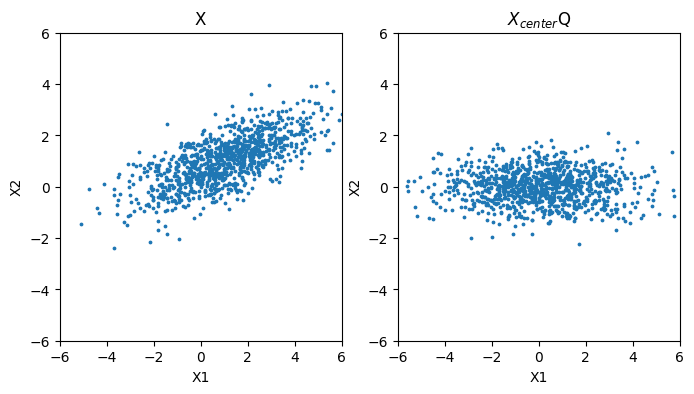

In [5]:
from scipy.stats import multivariate_normal
from numpy.linalg import eigh
def set_ax(ax, title):
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# 평균이 모두 1이고 공분산 행렬 cov를 따르는 다변량 정규분포의 표본을 뽑습니다.
cov = np.array([[4, 2 ** 0.5], [2 ** 0.5, 1]])
X = multivariate_normal.rvs(mean=[1, 1], cov=cov, size=1000)
# mean centering을 합니다.
X_center = X - X.mean(axis=0)
# A 공분산 행렬을 구합니다.
A = np.dot(X_center.T, X_center) / (X_center.shape[0] - 1)
# A를 고윳값 분해 합니다.
Lambda, Q = eigh(A)
# 큰 고윳값을 우선으로 Lambda, Q를 정렬합니다.
# Lambda의 내림차순으로 인덱스를 정렬합니다.
idx = np.argsort(-Lambda)
# 이에 따라, Lambda와 Q도 이에 따라 재배치 합니다.
Lambda, Q = Lambda[idx], Q[:, idx]

axes = axes.ravel()
axes[0].scatter(X[:, 0], X[:, 1], s=3)
set_ax(axes[0], 'X')

XQ = np.dot(X_center, Q)
axes[1].scatter(XQ[:, 0], XQ[:, 1], s=3)
set_ax(axes[1], '$X_{center}$Q')
plt.show()

In [6]:
# XQ의 평균을 구해봅니다.
np.mean(XQ, axis=0)

array([1.19382282e-15, 9.20000187e-16])

### 주성분 분석 정리

X의 주성분 분석의 과정은 아래와 같이 정리 됩니다.

1. $A = cov(X)$


2. A의 고윳값 분해를 통해 아래의 $\Lambda$와 Q를 얻습니다.


> A의 각 고윳값들로 구성된 벡터 $\Lambda = \begin{bmatrix}\lambda_1 & \lambda_2 & ...  & \lambda_p \end{bmatrix}^T$
>
> 고윳값에 해당하는 고유 벡터로  $q_1, q_2, ..., q_p$ 구성된 고유행렬 $Q = \begin{bmatrix} q_1 & q_2 & \ldots & q_p \end{bmatrix}$


3. 평균이 0이 되도록 X를 이동시킵니다.

> $X_{center} = X - \bar{X}$

4. 성분을 도출합니다.

> $C = X_{center}Q$ 


#### 주성분 분석의 의미


$C = \begin{bmatrix} c_{11} & c_{12} & \ldots & c_{1p} \\ c_{21} & c_{22} & \ldots & c_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ c_{n1} & c_{n2} & \ldots & c_{np} \end{bmatrix} = \begin{bmatrix} c_1 & c_2 & ... c_p  \end{bmatrix}$
로 나타냅니다.

$c_i$는 고윳값이 큰 값을 우선으로 정렬이 된 상태임을 가정합니다.

> $C$의 변수들은 서로 독립이므로, 변수간에 공유하는 정보는 없습니다. 따라서,  성분 $c_i$의 분산 $\lambda_i$는 설명된 변동성이 됩니다.
>
> $\sum_{i=1}^p \lambda_i$는 데이터가 지닌 전체 변동성을 의미합니다.
>
> $c_1$ 부터 $c_i$는 선형 변환 통해 i개의 변수로 만들 때 성분 중에서 최대의 변동량을 설명합니다.
>

→ 차원 축소로 활용할 수 있습니다.


### 주성분 분석을 통한 차원 축소

주성분 분석을 통해 나온 고윳값이 높은 것을 우선으로 성분을 선택합니다.

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 중 변수 fruitset, fruitmass, seeds 를 주성분 분석을 통해 얻을 수 있는 성분들의 분산 설명력(Explained Variance)와 분산 설명율(Explained Variance Ratio)을 분석해봅니다.
    
이 과정에서 3개의 변수를 선택하고 평균중심화 처리한 행렬을 **X_mc**라고 하고 이후 예제에서도 활용합니다. 

</div>

In [7]:
from scipy.stats import zscore
# mean centering을 합니다.
X_cols = ['fruitset', 'fruitmass', 'seeds']
# 표준화를 수행합니다. 표준화를 하면 평균이 0이 되므로 따로 mean centering은 하지 않습니다.
X_mc = zscore(df_berry[X_cols], ddof=1)
Lambda, Q = eigh(X_mc.T.dot(X_mc) / (len(X_mc) - 1))
idx = np.argsort(-Lambda)
Lambda, Q = Lambda[idx], Q[:, idx]
X_pca = np.dot(X_mc, Q)

Lambda, Lambda / np.sum(Lambda)

(array([2.93754525, 0.05616667, 0.00628807]),
 array([0.97918175, 0.01872222, 0.00209602]))

첫번째 성분만으로 전체 변동성의 0.98(98%)를 나타냅니다(설명합니다).

즉 첫번째 성분만 취해도 세 개의 변수 fruitset, fruitmass, seeds 지닌 정보의 98%를 나타낼 수 있습니다.

In [8]:
# 전체 변동성의 0.98 설명할 수 있는 첫번째와 두번째 성분을 선택합니다.
X_pca_sel = X_pca[:, :1]

### 역변환

선택한 성분들은 역변환을 통해 원래의 변수로 변환합니다. 

$X^{'} = C'Q'^T$ 입니다.

> $C'$는 선택한 성분들로 이루어진 행렬입니다.
>
> $Q'$은 선택한 성분들의 고유벡터로 구성된 행렬입니다.

이론상, **모든 성분**을 선택했다면, 변환 이전과 동일한 변수가 됩니다. 

※ 실제로는, Floating point 연산 과정에서 오차로 인한 미세한 차이가 있을 수 있습니다.

반면 일부 성분만 취했다면, 선택한 성분들이 설명해주는 변동성의 비율이 차이가 납니다.

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**X_mc**를 주성분 분석을 통해 얻을 수 있는 성분들을 분산 설명력이 높은 성분 우선으로 

1 ~ 3개 까지 성분을 선택하면서, 역변환을 합니다. 이들이 지닌 분산과 원래의 분산의 비율을 계산해봅니다.

</div>

In [9]:
for i in range(1, 4):
    X_pca_sel = X_pca[:, :i]
    X_inv = np.dot(X_pca[:, :i], Q.T[:i])
    print(i, np.square(X_inv - X_mc).mean() / X_mc.var(), 1 - np.sum(Lambda[:i]) / np.sum(Lambda))

1 0.020818249315840885 0.020818249315840975
2 0.0020960245390339756 0.0020960245390341248
3 6.654991309234744e-32 0.0


**sklearn.decomposition.PCA**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|n_components|정수: 출력할 성분수 - 고윳값이 높은 성분 우선으로 선택합니다.<br/> 0에서 1사이의 실수: 전체 변동성에서 n_components 만큼의 비율을 설명할 수 있는 최소의 성분수 만큼 선택합니다.<br/> None 전체 성분을 선택합니다.||

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_mc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# pca.explained_variance_: 고윳값, 
pca.explained_variance_, pca.explained_variance_ratio_

(array([2.93754525, 0.05616667, 0.00628807]),
 array([0.97918175, 0.01872222, 0.00209602]))

In [12]:
# pca.components_: Q^T: 고유행렬의 전치행렬
pca.components_

array([[-0.57283248, -0.5777839 , -0.58140237],
       [ 0.79919179, -0.55126813, -0.23957448],
       [ 0.18208632,  0.60188804, -0.77754444]])

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**X_mc**의 전체 변동성에서 98%이상을 설명할 수 있는 최소의 성분을 구하도록 sklearn.decomposition.PCA 를 설정하여 구해봅니다.
    
</div>

In [13]:
pca = PCA(n_components=0.98)
pca.fit(X_mc)
pca.explained_variance_ratio_  # 분산설명율

array([0.97918175, 0.01872222])

In [14]:
pca.transform(X_mc)

array([[ 1.79149784, -0.15999271],
       [ 1.06627216, -0.15529044],
       [ 2.26436013, -0.24544258],
       ...,
       [ 2.05156619, -0.08108127],
       [ 2.12067234, -0.07926177],
       [ 2.46330934, -0.09891771]])

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**X_mc**를 주성분 분석을 통해 얻을 수 있는 성분들을 분산 설명력이 높은 성분 우선으로 

1 ~ 3개 까지 성분을 선택하면서, 역변환을 합니다. 이들이 지닌 분산과 원래의 분산의 비율을 계산해봅니다.

이 과정을 sklearn.decomposition.PCA를 사용하여 해봅니다.

</div>

In [15]:
for i in range(1, 4):
    pca = PCA(n_components=i).fit(X_mc)
    X_pca = pca.transform(X_mc)
    X_inv = pca.inverse_transform(X_pca)
    print(i, np.square(X_inv - X_mc).mean() / X_mc.var(), 1.0 - np.square(X_inv - X_mc).mean() / X_mc.var())
print(pca.explained_variance_ratio_)    

1 0.020818249315840885 0.9791817506841591
2 0.0020960245390339756 0.997903975460966
3 7.821764783004277e-32 1.0
[0.97918175 0.01872222 0.00209602]


## 2.특이값 분해(Singular Value Decomposition, SVD)

특이값 분해(SVD, Sigular Value Decomposition): m×n 행렬 $M$을 아래와 같이 3개의 행렬 $U$, $\Sigma$, $V^T$로 곱으로 분해하는 것입니다. 

$M = U \Sigma V^T$

> $U$: m×m 정규 직교 행렬입니다.(U^TU = I), 좌측 특이 행렬

> $\Sigma$: m × n 대각 행렬입니다. 대각 요소를 특이값이라고 합니다.

> $V$: n×n 정규 직교 행렬입니다.(V^TV = I), 우측 특이 행렬


- 특이값은 이와 대응이 되는 $U$, $V$에서의 벡터들이 얼마나 특이한(singular) 지를 나타내는 나타냅니다.

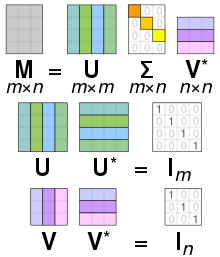

※ 이미지 출처: https://en.wikipedia.org/wiki/Singular_value_decomposition

### 주요 성질

- $U$ 는 $M M^T$의 고윳값 분해를 통해 얻을 수 있습니다.

> $M M^T = U \Sigma V^T V \Sigma^T U^T = U \Sigma \Sigma^T U^T$

- $V$ 는 $M^T M$의 고윳값 분해를 통해 얻을 수 있습니다.

> $M^T M = V \Sigma^T U^T U \Sigma V^T = V \Sigma^T \Sigma V^T$

- $\Sigma$는 $U$, $V$를 구하는 과정에서 얻을 수 있습니다.


- 주성분 분석을 특이값 분해로 구현할 수 있습니다.

<div style="border: 0px solid #ddd; padding: 5px; margin-top: 10px; margin-left: 30px;">

M의 모든 변수의 평균이 0인 평균 중심화된 상태로 만듭니다

> $X = M - E(M)$
>
> $cov(X) = \frac{1}{n - 1}X^TX = \frac{1}{n - 1} V \Sigma^T \Sigma V^T$
>
> $Q = V$
>
>$\Lambda = \frac{1}{n - 1}\Sigma^T \Sigma$ 
>
> $C = XV = U \Sigma$

가 됩니다.
    
</div>

**numpy.linalg.svd**

특이값 분해 함수 입니다.

|이름|설명|
|---|:-----|
|full_matrices|full SVD 여부로 왼쪽 특이행렬의 사이즈를 m×m으로 반환합니다.|

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
**X_mc**를 특이값 분해를 합니다. **X_mc**를 주성분 분석한 결과와 비교해봅니다.
    
</div>

In [16]:
from numpy.linalg import svd
U, Sigma, VT = svd(X_mc)
U, Sigma, VT

(array([[-0.03752262,  0.02423427, -0.00683731, ..., -0.04252111,
         -0.0439883 , -0.0516902 ],
        [-0.02233289,  0.02352201, -0.01621438, ..., -0.00726919,
         -0.00659548, -0.00808053],
        [-0.04742664,  0.03717746, -0.00931511, ..., -0.03362016,
         -0.03220682, -0.03094332],
        ...,
        [-0.04296971,  0.01228147, -0.0315652 , ...,  0.99718923,
         -0.00282258, -0.00310419],
        [-0.04441712,  0.01200587, -0.03000578, ..., -0.00281749,
          0.99716608, -0.00312736],
        [-0.0515936 ,  0.01498318, -0.02841987, ..., -0.00308425,
         -0.00311302,  0.99653263]]),
 array([47.74447733,  6.60191936,  2.20896925]),
 array([[ 0.57283248,  0.5777839 ,  0.58140237],
        [-0.79919179,  0.55126813,  0.23957448],
        [-0.18208632, -0.60188804,  0.77754444]]))

$Q = V$

$\Lambda = \frac{1}{n - 1}\Sigma^T \Sigma$ 

고윳값 분해를 통한 주성분 분석과 특이값 분해를 통한 주성분 분석의 결과는 특이값 분해 알고리즘 특성에 따른 부호에 차이가 발생할 수 있습니다.

In [17]:
Lambda, Q = eigh(np.cov(X_mc.T))
idx = np.argsort(-Lambda)
Lambda, Q = Lambda[idx], Q[:, idx]
Lambda, Sigma ** 2 / (X_mc.shape[0] - 1), Q, VT.T

(array([2.93754525, 0.05616667, 0.00628807]),
 array([2.93754525, 0.05616667, 0.00628807]),
 array([[-0.57283248, -0.79919179, -0.18208632],
        [-0.5777839 ,  0.55126813, -0.60188804],
        [-0.58140237,  0.23957448,  0.77754444]]),
 array([[ 0.57283248, -0.79919179, -0.18208632],
        [ 0.5777839 ,  0.55126813, -0.60188804],
        [ 0.58140237,  0.23957448,  0.77754444]]))

$C = XV = U \Sigma$

In [18]:
Lambda, U = eigh(np.dot(X_mc, X_mc.T))
idx = np.argsort(-Lambda)
Lambda, U = Lambda[idx], U[:, idx]
np.dot(U, np.diag(Lambda)[:, :3] ** 0.5).real

array([[-1.79149784,  0.15999271,  0.01510341],
       [-1.06627216,  0.15529044,  0.03581707],
       [-2.26436013,  0.24544258,  0.0205768 ],
       ...,
       [-2.05156619,  0.08108127,  0.06972656],
       [-2.12067234,  0.07926177,  0.06628184],
       [-2.46330934,  0.09891771,  0.06277862]])

In [19]:
np.dot(X_mc, Q)

array([[ 1.79149784,  0.15999271, -0.01510341],
       [ 1.06627216,  0.15529044, -0.03581707],
       [ 2.26436013,  0.24544258, -0.0205768 ],
       ...,
       [ 2.05156619,  0.08108127, -0.06972656],
       [ 2.12067234,  0.07926177, -0.06628184],
       [ 2.46330934,  0.09891771, -0.06277862]])

### 축소된 특이값 분해(Reduced SVD)

1. full SVD: $U$, $V$에서 대응되는 특이값에 상관 없이 모든 특이벡터를 포함하는 특이값 분해입니다.

> $M = U \Sigma V^*$

2. thin SVD: full SVD에서 $\Sigma$가 정방 행렬이 되는 만큼만 축소 시킨 특이값 분해입니다.

> $k << \max(n,m)$ 환경에서 더 빠르고 효과적입니다.
>
> $M = U_k \Sigma_k V^*_k, \text{ where } k=\min(n,m)$

3. compact SVD: $U$, $V$에서 대응되는 특이값이 0이 아닌 값만 남긴 특이값 분해입니다. 

>$r <<\min(n,m)$ 환경에서 더 빠르고 효과적입니다.
>
> $M = U_r \Sigma_r V^*_r$

4. Truncated SVD: $U$, $V$에서 대응되는 특이값이 특정 임계점 이상만 남긴 특이값 분해입니다.

$\bar{M} = U_t \Sigma_t V^*_t$, 더 이상 원래 Matrix $M$과 동일하지 않지만, $M$에 대한 근사 행렬 $\bar{M}$을 제공합니다.

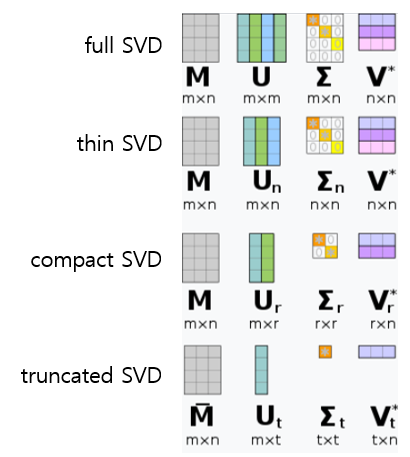

※ 이미지 출처: https://en.wikipedia.org/wiki/Singular_value_decomposition

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
축소된 특이값 분해를 특징을 살펴보고자, 먼저 data/camellia.jpg 이미지를 불러옵니다. 이후, 축소된 특이값 분해(Reduced SVD)의 다양한 설정들을 이미지에 적용해보며 해당 이미지가 어떻게 변화하는지 비교해보겠습니다.
    
</div>

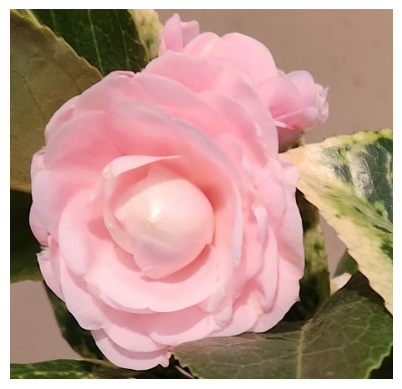

(443, 458, 3)

In [20]:
img = mpimg.imread('data/camellia.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()
img.shape

In [21]:
from numpy.linalg import svd
def svd_img(img, r = None):
    """
    Parameters:
        img: numpy array
            RGB 3차원 픽셀 데이터
        r: int
            특이값 분해(SVD) rank, None: full SVD
    Returns:
        특이 행렬들을 통한 이미지 복원 데이터, 원본 데이터와의 SSE(sum of squared error)
    """
    
    img2 = []
    if r is None:
        # Full SVD
        for j in range(3):
            U, Sigma_, VT = svd(img[:, :, j])
            Sigma = np.zeros_like(img[:, :, 0], dtype='float')
            for i in range(len(Sigma_)):
                Sigma[i,i] = Sigma_[i]
            img2.append(np.dot(np.dot(U, Sigma), VT))
    else:
        if r <= 0:
            r = min(img.shape[:2]) # thin SVD
        for j in range(3):
            U, Sigma, VT = svd(img[:, :, j], full_matrices=False)
            U =  U[:, :r]
            VT = VT[:r]
            img2.append(np.dot(U * Sigma[:r], VT))
    img2 = np.stack(img2, axis=-1).clip(0, 255)
    sse = np.sum(np.square(img - img2))
    return np.round(img2).astype(int), sse

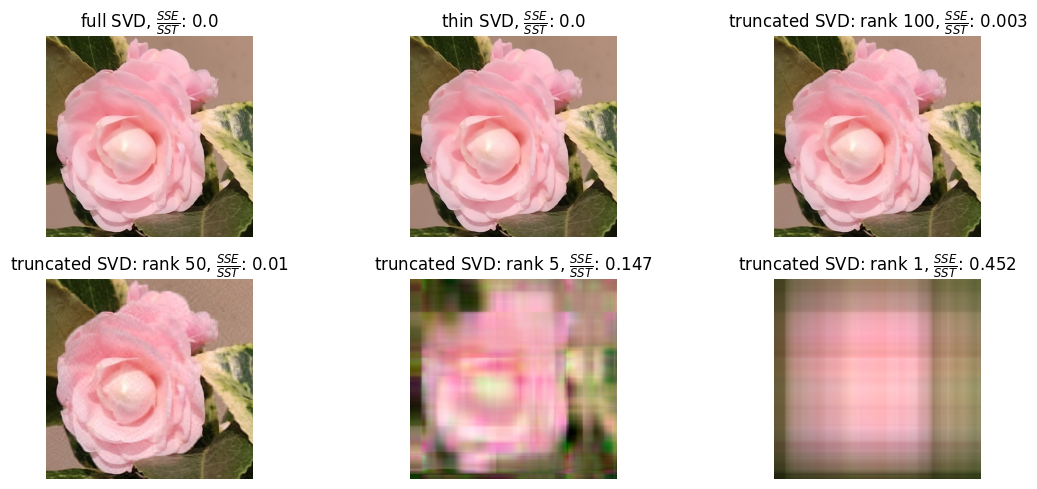

In [22]:
profiles = [
    ('full SVD', None), 
    ('thin SVD', 0), 
    ('truncated SVD: rank 100', 100), 
    ('truncated SVD: rank 50', 50), 
    ('truncated SVD: rank 5', 5), 
    ('truncated SVD: rank 1', 1)
]
fig, axes = plt.subplots(2, 3, figsize = (12, 5))
sst = np.sum(np.square(img - np.mean(img)))
for profile, ax in zip(profiles, axes.ravel()):
    img2, sse = svd_img(img, profile[1])
    ax.imshow(img2)
    ax.set_title('{}, {}: {}'.format(profile[0], "$\\frac{SSE}{SST}$", np.round(sse / sst, 3)))
    ax.axis('off')
plt.tight_layout()
plt.show()

**sklearn.decomposition.TruncatedSVD**

sklearn의 trucated SVD는 sparse matrix에서의 효과적인 차원 감소를 지원합니다.

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|n_components|출력 변수의 성분 수|

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
df_spam에서 80%를 학습 데이터 df_train으로 나머지 20%는 평가 데이터는 df_test로 나누어 봅니다. 

최소한 5건의 메세지에 등장한 단어의 빈도를 입력 변수(속성)으로 사용하여 target 변수를 예측하는 모델을 만들고자 합니다.

로지스틱 회귀 모델을 사용하고, 단어의 빈도 측정과 모델의 학습은 학습 데이터 df_train을 대상으로 합니다. 

입력 변수의 차원을 Truncated SVD를 이용하여 변수의 수를 아래에 제시된 수에 맞춰 줄였을 때, 각 경우의 평가 데이터에 대한 성능을 측정합니다.
    
```
    [16, 32, 64, 128, 256]
```
    
성능 지표는 AUC(Area Under of the receiver characteristic Curve)를 사용합니다.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_spam, train_size=0.8, random_state=123)

In [24]:
cnt_vec =  CountVectorizer(lowercase=True, min_df=5)
cnt_vec.fit(df_train['message'])
cnt_vec.transform(df_train['message'])

<4459x1558 sparse matrix of type '<class 'numpy.int64'>'
	with 49596 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.metrics import roc_auc_score
r_list = [16, 32, 64, 128, 256]
roc_train, roc_test = [], []
for i in r_list:
    clf_lr = make_pipeline(
        CountVectorizer(lowercase=True, min_df=5),
        TruncatedSVD(i),
        LogisticRegression(solver='lbfgs')
    )
    clf_lr.fit(df_train['message'], df_train['target'])
    roc_train.append(
        roc_auc_score(df_train['target'], clf_lr.predict_proba(df_train['message'])[:, 1])
    )
    roc_test.append(
        roc_auc_score(df_test['target'], clf_lr.predict_proba(df_test['message'])[:, 1])
    )

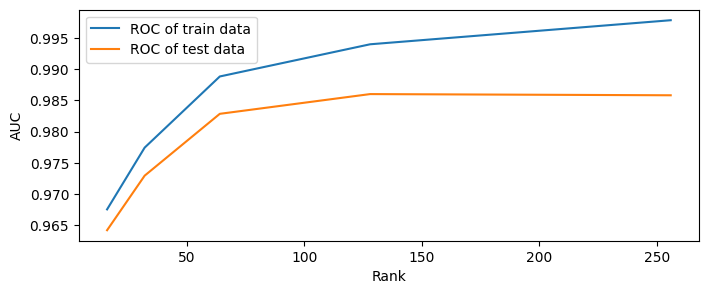

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(r_list, roc_train, label='ROC of train data')
plt.plot(r_list, roc_test, label='ROC of test data')
plt.xlabel('Rank')
plt.ylabel('AUC')
plt.legend()
plt.show()

## 3. 다차원 척도법(Multidimensional Scaling, MDS)

k차원의 데이터를 m차원(m ≤ k)의 데이터로 원래 데이터간의 거리 정보를 최대한 유지하면서 변환합니다.

### 고전적 MDS(Classical MDS)

고전적 MDS는 strain이라 불리는 손실 함수를 최소화시킵니다. 고전적 MDS는 메트릭 거리(metric distance)만 지원합니다. 

> 메트릭 거리(metric distance): 비음성, 대칭성, 삼각 부등식 (x, y, z 세점은 직선 거리보다 작거나 같습니다.). Ex) 유클리디언 거리

고전적 MDS는 Strain이라는 손실 함수를 사용합니다.

$Strain_D(x_1, x_2, ..., x_n) = \sqrt{\left(\frac{\sum_{i,j} (b_{ij} - x_i^Tx_j)^2}{\sum_{i, j}b^2_{ij}}\right)}$

> $x_i$ : n 차원 내부 각각의 벡터를 의미합니다.
>
> $b_(ij)$ : 학습 알고리즘 step 2에서 정의된 $B$의 요소입니다.


#### 학습 알고리즘

$d_{ij}$: 데이터 포인트 i와 j 사이의 메트릭 거리(metric distance)

1. squared proximity matrix $D$ 를 준비합니다.

> $D^{(2)} = \begin{bmatrix} d^2_{ij} \end{bmatrix}$

2. $C$ 와 $D$ 를 이용하여 matrix $B$ 를 계산합니다.

> $C = I - \frac{1}{n}J, J는 n×n 모든 요소가 1인 행렬$ 
>
> $B = -\frac{1}{2}CD^{2}C$ 


3. B를 고윳값 분해하고 고윳값이 큰 값을 기준으로 k개 만큼 선택하여, 
k개의 고유벡터로 구성된 $Q_k$와 고윳값 제곱근이 대각요소인 $\Lambda_k^{0.5}$ 을 만듭니다.


4. $X_{mds} = Q_m\Lambda_m^{0,5}$

**[Ex.9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

sklearn.datas.load_digits을 통해 sklearn에 내장되어 있는 숫자 필기 데이터를 불러 옵니다.

고전적 다차원 척도법의 결과를 시각화해 봅니다.

</div>

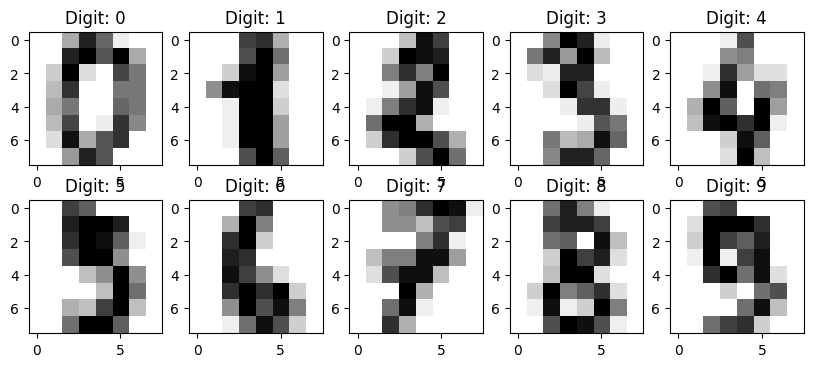

In [27]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits['images'].reshape(-1, 64)
y_digits = digits['target']

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
# 10개의 데이터만 시각화해봅니다.
for i, ax in zip(range(10), axes.ravel()): 
    ax.imshow(X_digits[i].reshape([8, 8]), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit: %i' % y_digits[i])
plt.show()

In [28]:
from scipy.spatial.distance import pdist, squareform
n = X_digits.shape[0]
D2 = squareform(pdist(X_digits) ** 2)
C = np.eye(n) - np.ones_like(D2) / n
B = -0.5 * np.matmul(np.matmul(C, D2), C)
eigenval, eigenvec = np.linalg.eigh(B) # eigh는 대칭행렬의 고윳값 분해에 효과적입니다.

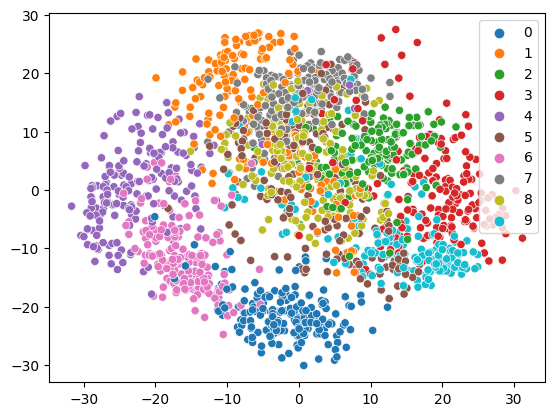

In [29]:
k = 2
idx = np.argsort(-eigenval)[:k] # 고윳값 역순으로 나오지 않아 고윳값이 큰 순으로 k개의 위치 인덱스를 선택합니다.
Lambda_05 = eigenval[idx] ** 0.5
Qm = eigenvec[:, idx]
X_mds = Lambda_05 * Qm

sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_digits.astype('str'))

plt.show()

### Metric MDS 

고전적 MDS를 다양한 거리를 지원하도록 최적화 과정을 보다 일반화 했습니다.

MDS에서는 stress 손실 함수로 사용합니다.

$stress_D(x_1, x_2, ..., x_n) = \sqrt{\sum_{i \ne j = 1, ..., n} \left(d_{ij} - ||x_i - x_j||\right)^2}$

학습 알고리즘은 [stress optimization](https://en.wikipedia.org/wiki/Stress_majorization) 이라는 알고리즘을 사용합니다.

### Non-metric MDS

Metric MDS는 거리를 최대한 유지하는 방식인 반면, Non-metric MDS는 거리의 랭킹을 유지하는 방식입니다.

$stress_D(x_1, x_2, ..., x_n) = \sqrt{\frac{\sum_{i < j} \left(f(d_{ij}) - ||x_i - x_j||\right)^2}{\sum_{i < j} \left(||x_i - x_j||\right)^2}}$

> $d_{ij}$는 $x_i$와 $x_j$사이의 유클리드 거리입니다.
>
>  함수 f는 단조 증가 함수입니다.

**sklearn.manifold.MDS**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|n_components|출력 변수의 성분 수|
|metric|True: metric MDS, False: non-metric MDS|

**[Ex.10]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 9]의 digit 데이터를 metric 방법과 Non-metric 방법으로 했을 때 결과를 시각화하여 비교합니다.

</div>

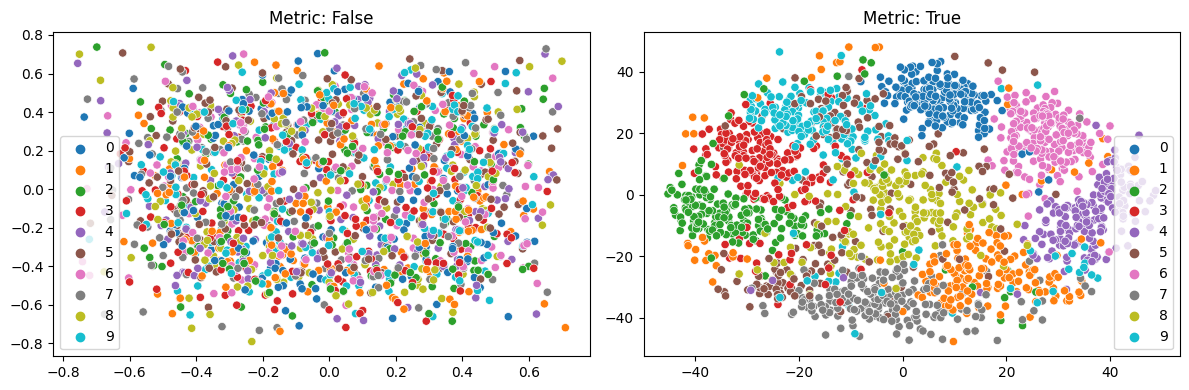

In [30]:
from sklearn.manifold import MDS

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for metric, ax in zip([False, True], axes.ravel()):
    mds = MDS(n_components=2, metric=metric)
    X_mds = mds.fit_transform(X_digits)
    sns.scatterplot(x = X_mds[:, 0], y = X_mds[:, 1], hue=y_digits.astype('str'), ax=ax)
    ax.set_title("Metric: {}".format(metric))
plt.tight_layout()
plt.show()

## 4. t-확률적 이웃 임베딩 (t-distributed Stochastic Neighbor Embedding, t-SNE)

고차원의 데이터를 시각화하기 위해 2, 3 차원의 데이터로 차원을 축소시키는 통계적 방법입니다.

- 원래 공간의 두 데이터 포인트의 거리가 가까울수록 높은 확률을, 멀수록 낮은 확률을 부여하는 확률 분포를 만듭니다.

가우시안 분포를 기반합니다.

> $p_{j|i} = \frac{exp\left(-||x_i - x_j||^2/2\sigma^2_i\right)}{\sum_{k \ne i}exp\left(-||x_i - x_k||^2/2\sigma^2_i\right)}$
>
> $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$, $n$: 데이터 수

- 축소 공간의 두 데이터 포인트에서도 거리가 가까울수록 높은 확률을 멀수록 낮은 확률을 부여하는 확률 분포를 만듭니다. 

자유도 1인 t분포를 기반으로합니다.

> $q_{ij} = \frac{\left(1 + ||y_i - y_j||^2\right)^{-1}}{\sum_k\sum_{l \ne k}\left(1 + ||y_k - y_l||^2\right)^{-1}}$
>
> 자유도가 1인 t분포의 확률 밀도 함수 $\frac{1}{\sqrt{\pi \nu} \Gamma\left(0.5\right)} \left(1 + t^2\right)^{-1}$


t-SNE의 학습은 원래 공간과 축소 공간의 확률 분포의 차이를 KL divergence로 측정하고, 이는 곧 손실 함수(Loss)가 되고, 경사하강법에 의해 학습됩니다.

> $L = KL(P||Q) = \sum_{i \ne j} p_{ij}log\frac{p_{ij}}{q_{ij}}$
>
> $\frac{\partial{L}}{\partial{y_i}} = 4 \sum_j(y_i - y_j)(p_{ij} - q_{ij})\left(1 + ||y_i - y_j||^2\right)^{-1}$

**sklearn.manifold.TSNE**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|n_components|출력 변수의 성분 수|
|perplexity|5와 50사이의 수로 큰 사이즈의 데이터일수록 큰 수를 설정합니다.|

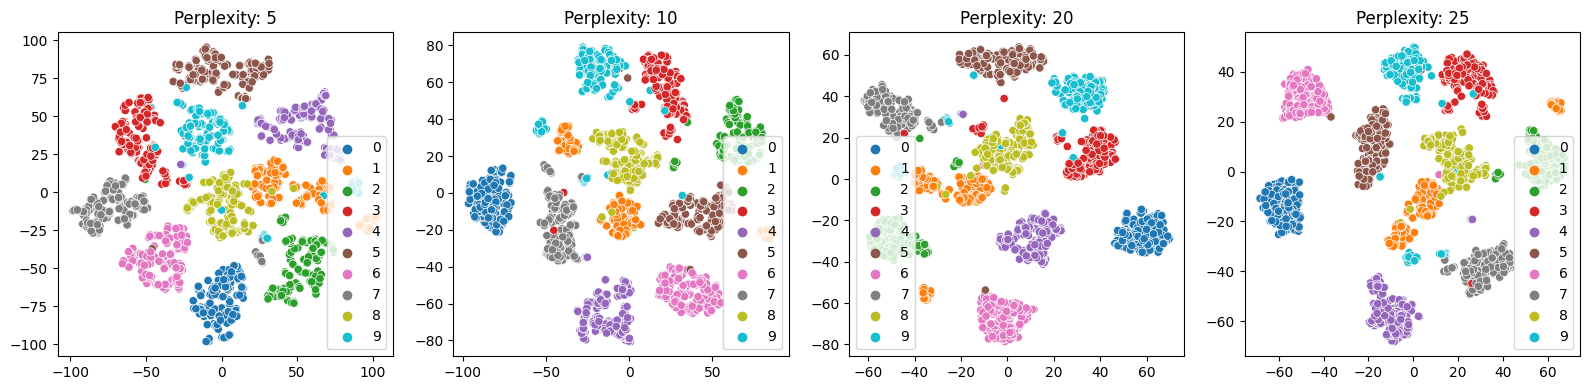

In [31]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for perplexity, ax in zip([5, 10, 20, 25], axes.ravel()):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_digits)
    sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y_digits.astype('str'), ax=ax)
    ax.set_title("Perplexity: {}".format(perplexity))
plt.tight_layout()
plt.show()

## 5. 선형판별분석 (Linear Discriminant Analysis, LDA)

주성분 분석(PCA)은 k 차원의 데이터를 가장 잘 설명하는 선형 변환을 찾음과 동시에 각 성분이 설명하는 변동성을 분석해줍니다.

선형판별분석(LDA)은 k 차원의 데이터로 클래스를 선형판별기로 분류할 때 가장 잘 구분하는 선형 변환을 찾음을 목표로 합니다.

### 주요 아이디어

- 클래스 간의 변동성을 가장 잘 설명하는 변환과, 클래스 내의 변동성을 최소화하는 변환을 찾는 것입니다.

- 이를 위해 클래스 간의 공분산과 클래스 내의 공분산을 이용합니다.

클래스 간의 공분산 

> $\Sigma_b = \frac{1}{C}\sum_{i=1}^C(\mu_i - \mu)(\mu_i - \mu)^T$, $\mu_i$: 클래스 i의 평균점, $\mu$: 전체 평균점

**클래스 내 공분산은 아래와 같이 동일하다고 가정합니다.**

> $\Sigma = \Sigma_1 = ... = \Sigma_C$

#### 학습 알고리즘

주성분 분석(PCA)에서 사용했던 고윳값 분해를 이용하여 변동성을 가장 잘 나타내는 선형 변환을 찾는 과정을 적용합니다. 

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 20px;">

$\Sigma_b$의 변동성을 잘 설명하는 최적의 선형 변환은 고윳값 분해를 통해 구할 수 있습니다. 

> $\Sigma_b = Q_b \Lambda_b Q_b^T$

이 경우 고윳값은 C - 1 개 까지 구할 수 있습니다.

그리고 클래스 내 공분산의 최소화하는 선형 변환은 마찬가지로 고윳값 분해를 통해 구할 수 있습니다. 

$\Sigma = Q \Lambda Q^T$ 에서 양쪽의 역함수를 취하면, 
    
> $\Sigma^{-1} = Q \Lambda^{-1} Q^T$

가 $\Lambda$가 역수가 되어 최소화하는 변환이 됩니다.

이 두 과정을 하나의 고윳값 분해를 통해 구현합니다. 

$S = \Sigma^{-1}\Sigma_b$

S를 고윳값 분해를 하면, 클래스 간의 변동성을 최대한 나타내는 선형 변환을 찾을 수 있고 또한 각 성분이 나타내는 변동성을 구할 수 있습니다.

</div>

**[Ex.11]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 9]의 digit 데이터를 선형판별분석을 통해 성분을 구하고 분산 설명율이 가장 큰 성분 2개를 선택하여
   
클래스별 분포를 시각화해봅니다.

</div>

In [32]:
# S는 대칭행렬이 아닙니다. 따라서, eigh가 아닌 eig를 사용합니다. 
from numpy.linalg import eig

df_digit = pd.DataFrame(X_digits)
df_digit = df_digit.loc[:, (df_digit != 0).any(axis=0)]
m = df_digit.mean(axis=0)
C = np.unique(y_digits).size
# 클래스로 그룹화하여 평균을 구하고, 클래스별 공분산을 구합니다.
Sigma_b = df_digit.groupby(y_digits).mean().pipe(lambda x: x - m).pipe(lambda x: x.T.dot(x)) / C
# 클래스 내의 공분산을 각 클래스에서 공분산의 평균으로 구합니다.
Sigma = df_digit.groupby(y_digits).transform(lambda x: x - x.mean()).cov()

S = np.matmul(np.linalg.inv(Sigma), Sigma_b)
Lambda, Q = eig(S)

In [33]:
explained_variance_ratio = Lambda[:C].real / Lambda[:C].real.sum()
Q = Q[:, :C].real
explained_variance_ratio

array([2.88187700e-01, 1.83248668e-01, 1.70008893e-01, 1.16136754e-01,
       8.38399596e-02, 6.54017075e-02, 4.28676742e-02, 2.92935012e-02,
       2.10151424e-02, 7.08394558e-17])

In [34]:
X_lda = df_digit.dot(Q[:, :9].real)
X_lda

,0,1,2,3,4,5,6,7,8
0,-0.227653,1.784011,0.066362,-0.865768,-0.278685,-0.359277,-0.035692,0.136615,-1.119912
1,0.358088,-1.705822,-1.166205,0.100324,-1.136348,0.980544,-0.025259,-1.577681,0.116223
2,0.868894,-1.337614,-2.178652,-0.661354,0.184396,0.468774,-0.728469,0.756903,-0.529782
3,0.975783,-0.114924,-0.141675,0.615213,-0.440138,-0.427787,0.719838,-0.599925,-0.608651
4,-1.162669,-1.049336,-0.329099,-0.366476,-0.532257,0.151855,0.288876,0.567722,-0.637063
...,...,...,...,...,...,...,...,...,...
1792,0.583695,0.571385,0.905697,-0.464262,-1.444914,-0.058597,-0.173030,1.251752,0.023383
1793,-0.332656,1.327030,-0.349560,-0.327237,0.286159,0.000346,-0.236578,-0.534700,-0.829014
1794,0.039772,-0.903351,-1.574418,-0.066595,-1.463605,-1.021976,-0.466437,1.247023,-1.765824
1795,0.386739,0.403940,0.118378,-0.634216,-1.242425,-0.129434,-0.291769,0.467365,0.285099


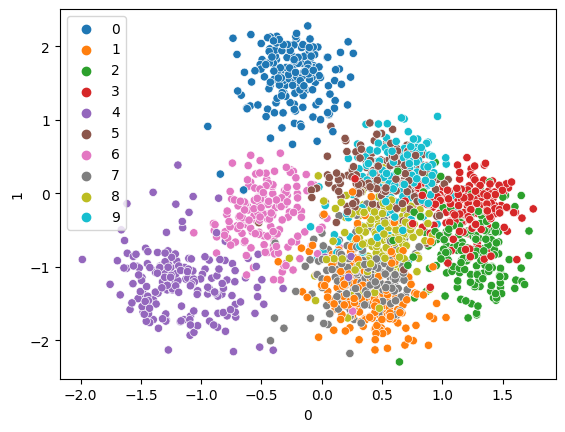

In [35]:
sns.scatterplot(x=X_lda[0], y= X_lda[1], hue=y_digits.astype('str'))
plt.show()

**sklearn.discriminant_analysis.LinearDiscriminantAnalysis**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|n_components|출력 변수의 성분 수, 최대  min(클래스 수 - 1, 변수 개수) 만큼 가질 수 있습니다.|

**[Ex.12]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 11]을 sklearn.discriminant_analysis.LinearDiscriminantAnalysis로 확인해봅니다.

</div>

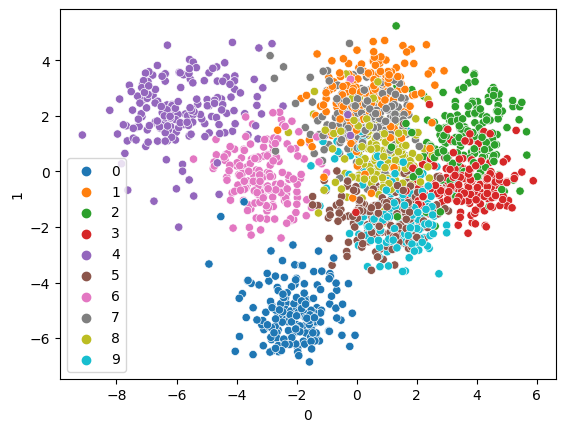

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = pd.DataFrame(lda.fit_transform(df_digit, y_digits))

sns.scatterplot(x=X_lda[0], y= X_lda[1], hue=y_digits.astype('str'))
plt.show()

## 6.부분 최소 제곱 회귀(Partial Least Squares Regression, PLS)

k차원의 입력 데이터 X와 수치형 대상 변수 y에서, y와의 공분산이 최대가 되는 X의 선형 변환을 찾아 차원을 축소하는 방법입니다. 


### 아이디어

선형 변환 t를 아래와 같이 정의 합니다. 

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 20px;">
$t = Xw$

$cov(t, y)$가 최대가되는 w를 구하면 아래와 같습니다. 

일단 입력 데이터 X의 모든 변수와 y는 평균중심화(mean centering)를 통해 평균이 모두 0이 된 상태임을 가정하면, 

$cov(t, y) = \frac{1}{n - 1}w^T X^T y$ 입니다.

$cov(t, y) = \frac{1}{n - 1}w^T (X^T y) = \frac{1}{n - 1} ||w^T|| \cdot ||X^T y|| cos \theta$ 

$-1 \le cos \theta \le 1$이므로 1일 때 $cov(t, y)$는 최대가 됩니다.
    
이 경우는 $\theta$가 0이고 \theta는 두 벡터 $w^T$와 $X^Ty$가 이루는 각이 0이 됩니다.

따라서, $w = X^T y$ 이고 w의 norm이 1이 되도록 정규화 시키면, $w = \frac{X^T y}{||X^T y||}$ 입니다.
    
</div>


### 학습 알고리즘 (NIPLS: Nonlinear Iterative Partial Least Square)

1. 입력 변수 X, y를 평균중심화를 합니다.


2. $w = \frac{X^T y}{||X^T y||}$


3. t = Xw 와 y를 정규방정식을 통해 해를 구합니다. 

> $\beta = (t^Tt)^{-1} (t^Ty)$


4. y에서 선형 모델 $\beta t$ 가 설명하지 못하는 값만을 남깁니다.

> $y = y - \beta t$


5. $w$, $\beta, t$ 를 저장합니다.


6. 종료 조건을 만족시키지 않으면 2 단계로 이동합니다.

**[Ex.13]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone 를 80%는 학습 데이터 df_train으로 나머지 20%는 평가 데이터 df_test로 나눕니다.
    
입력 변수는 'Sex', 'Rings'를 제외한 모든 변수이고
    
대상 변수는 'Rings' 입니다.
    
df_train에서 부분 최소 제곱 회귀를 방법을 사용하여 입력변수의 선형 변환을 구합니다.
       
df_train의 입력변수와 df_test의 입력변수를 이 선형 변환으로 X_train_t와 X_test_t 만듭니다.

선형 회귀 모델로 X_train_t으로 학습하고 X_test_t 평가합니다. 
    
변수의 수에 따른 성능을 보기 위해 첫 번째 변환 변수 부터 차례로 하나씩 늘려 가면서 학습 성능과 평가 성능을 측정해봅니다. 
    
평가 지표는 평균제곱오차 (Mean Squared Error, MSE)입니다.

</div>

In [37]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_abalone, train_size=0.8, random_state=123)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
X_cols = [i for i in df_abalone.columns if i not in['Sex', 'Rings']]

# 표준화는 평균 중심화를 포함합니다.
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(df_train[X_cols])
X_test_std = std_scaler.transform(df_test[X_cols])

# 대상 변수를 표준화 합니다.
y = zscore(df_train['Rings'])

t_vals, w_vals, beta_vals, = list(), list(), list()
thres = 1e-3
while True:
    # 대상변수와 공분산을 최대화 시키는 변화은  X_std^T y 입니다. 
    w = np.dot(X_train_std.T, y)
    # norm으로 벡터 w를 정규화합니다.
    w = w / (np.sum(np.square(w)) ** 0.5)
    t = np.dot(X_train_std, w)
    # 변수 t를 사용하여 y를 예측하는 선형회귀 계수를 구합니다.
    beta = 1 / np.dot(t.T, t) * np.dot(t.T, y) 
    y_hat = beta * t  
    # 종료 조건 체크
    if r2_score(y, y_hat) < thres:
        break
    t_vals.append(t)
    w_vals.append(w)
    beta_vals.append(beta)
    # t를 사용하여 y를 예측하는 회귀모델을 사용하여 설명만큼(y_hat)을 y에서 뺍니다.
    y = y - y_hat

# 단계에서 도출된 t를 모아 디자인 행렬을 만듭니다.
X_train_t = np.vstack(t_vals).T
# 학습데이터로 얻어진 선형변환을 사용하여 평가 데이터를 바꿉니다.
X_test_t = np.dot(X_test_std, np.vstack(w_vals).T)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg_lr = LinearRegression()
mse_train = []
mse_test = []
for i in range(1, (len(t_vals))):
    reg_lr.fit(X_train_t[:, :i], df_train['Rings'])
    mse_train.append(
        mean_squared_error(df_train['Rings'], reg_lr.predict(X_train_t[:, :i]))
    )
    mse_test.append(
        mean_squared_error(df_test['Rings'], reg_lr.predict(X_test_t[:, :i]))
    )

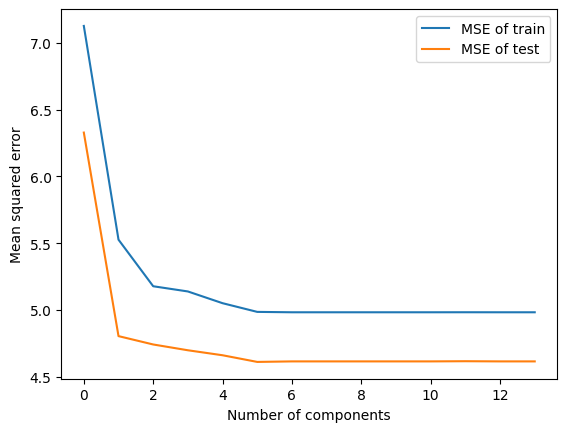

In [40]:
plt.plot(mse_train, label='MSE of train')
plt.plot(mse_test, label='MSE of test')
plt.xlabel('Number of components')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()